In [ ]:
from imdclient.IMD import IMDReader
import MDAnalysis as mda

import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, clear_output

import vdos as vd

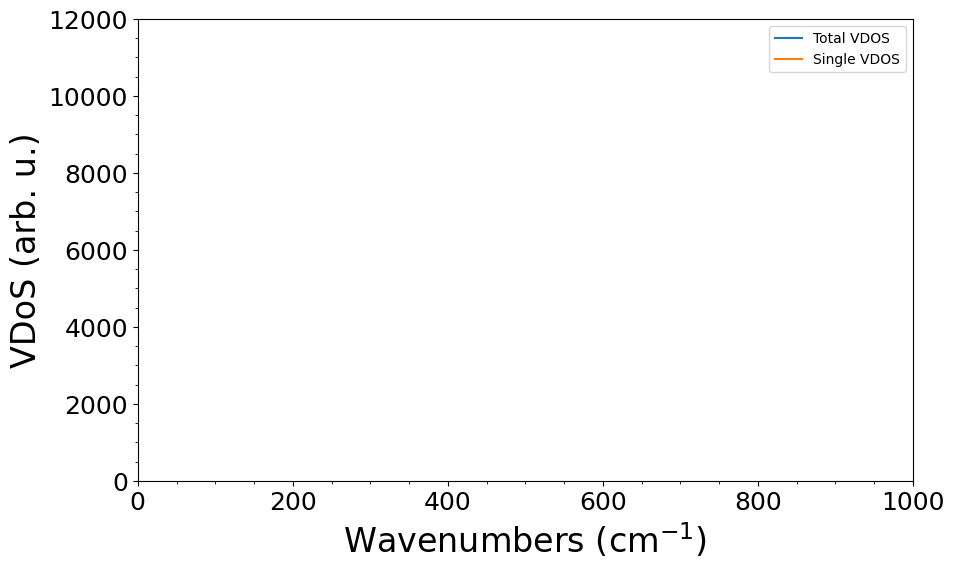

In [28]:
plt.ion()  # Turn on interactive mode
fig, ax = plt.subplots(figsize=(10, 6))
p_total, = ax.plot([], [], label='Total VDOS')
p_single, = ax.plot([], [], label='Single VDOS')
ax.set_xlabel('Wavenumbers (cm$^{-1}$)', fontsize=24,color='black')
ax.set_ylabel('VDoS (arb. u.)', fontsize=24, color='black')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 12000)
ax.tick_params(axis='both', which='major', labelsize=18)
ax.minorticks_on()
ax.legend()

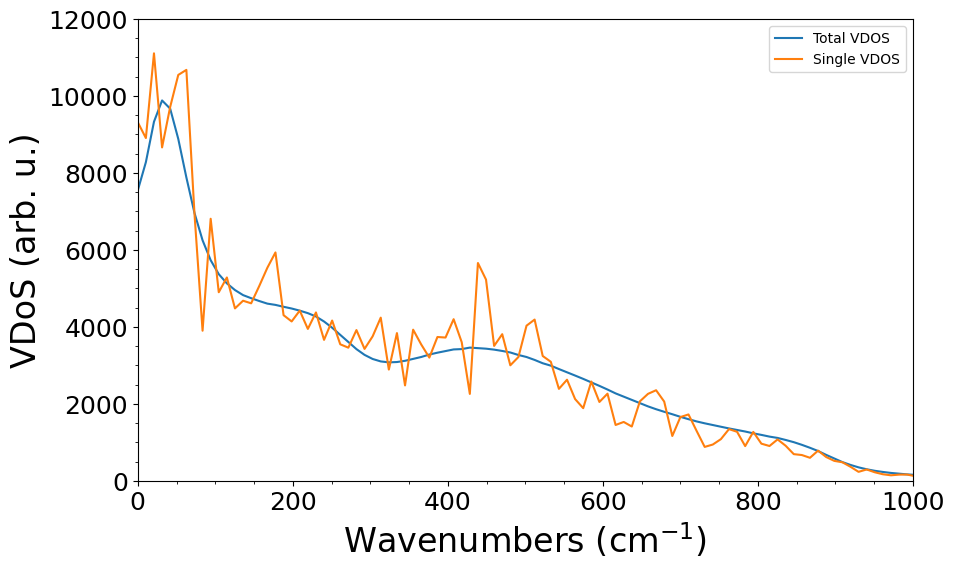

In [29]:
# %%
u = mda.Universe("mda.tpr", "imd://10.206.72.141:8888",buffersize = 10*1024*1024)
sel = u.select_atoms("resname SOL")
vdos = vd.vdos(sel,200)

vd.vdosLib.omp_set_num_threads(8)

tStep = 0

for ts in u.trajectory:
    vdos.single_frame(tStep,ts.time)

    if tStep % 200 == 0:
        vdos.copyResidueList()
        vdos.postProcess(vdos.residueListCopy,mode = "total+single")
        total = np.array(vdos.totVDoS[0])
        single = np.array(vdos.totVDoS[1])
        p_total.set_data(vdos.wavenumber, total)
        p_single.set_data(vdos.wavenumber, single)
        
        clear_output(wait=True)  # Clear previous output
        display(fig)  # Redisplay the updated figure
    
    tStep += 1
    
# %%
plt.ioff()